<a href="https://colab.research.google.com/github/ayushranjan6456/HydrogenPrediction/blob/main/Hydrogen_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/interpolated_merged.csv')

#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#remove reading where Gas=0
df= df[df['Gas'] != 0]

df

,time,pH,VFA,COD,Gas
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
5,1.206030,5.989551,3.315920,11.308109,0.966157
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


In [4]:
from sklearn.model_selection import train_test_split

TargetVariable=['Gas']
Predictors=['time', 'pH', 'VFA', 'COD']

x=df[Predictors].values
y=df[TargetVariable].values


#Replace 0 in y_test with small value to avoid divide by 0 error
# y[y == 0] = 0.01

In [5]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()

# # Now, it is very important to perform feature scaling here because pH, time, COD, VFA values lie in different ranges. 
# # If we don’t scale the features then the some features will dominate the other when the model finds the nearest neighbor to a data point in the data space. 
# x = sc_x.fit_transform(x)

# #Here all features values are scaled and now there in the -1 to 1.

# np.set_printoptions(suppress = True)   #to not print in scientific notation
# print (x[0:10, :])


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

x=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)


In [17]:
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x, y, test_size=0.1)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


# #X_train 4 input features, 70% of full dataset)
# # X_val (4 input features, 15% of full dataset)
# # X_test (4 input features, 15% of full dataset)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(975, 4)
(975, 1)
(418, 4)
(418, 1)


#Building the Neural Network

In [18]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=8, input_dim=4, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)


# model = Sequential([
#     Dense(2, activation='relu'),
#     Dense(1, activation='sigmoid'),
# ])

# #Filling in the best numbers. sgd - stochastic gradient descent

# model.compile(optimizer='sgd',
#               loss='mean_squared_error',
#               metrics=['accuracy'])

# hist = model.fit(X_train, Y_train,
#           batch_size=4, epochs=150,
#           validation_data=(X_val, Y_val))

Epoch 1/50
49/49 [==============================] - 2s 2ms/step - loss: 0.9931
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.9425
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.7759
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5545
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4372
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3873
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2915
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 11/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 12/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2316
Epoch 13/50
49/49 [==============================

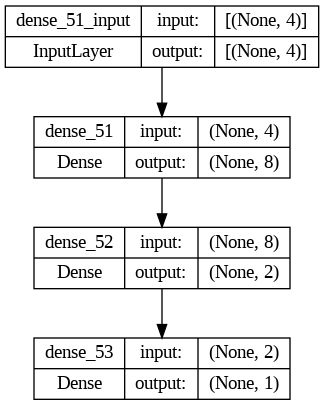

In [19]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0132


0.013193605467677116

In [10]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=8, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=2, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
            #Replace 0 in y_test with small value to avoid divide by 0 error
            # y_test[y_test == 0] = 0.01

            Abs_err = y_test - model.predict(X_test)

            err = (y_test - model.predict(X_test))/y_test

            abs_err = np.abs(err)

            MAPE = np.mean(abs_err) * 100
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 69.23935228821813
14/14 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 75.2363866415266
14/14 [==============================] - 0s 3ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 88.30949263895256
14/14 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 86.36891124492237
14/14 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 51.88212632693513
14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 43.414802121097686
14/14 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 86.68530046828833
14/14 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 86.45216318445003
14/14 [=============

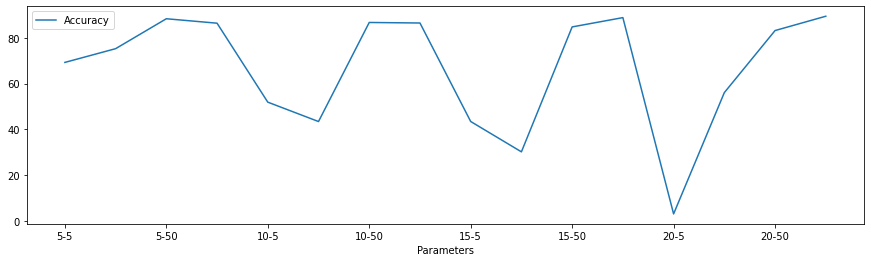

In [11]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [21]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 50, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Gas']=y_test_orig
TestingData['PredictedGas']=Predictions
TestingData.head()

14/14 [==============================] - 0s 2ms/step


,time,pH,VFA,COD,Gas,PredictedGas
0,29.909548,5.377574,4.308308,8.439824,28.198308,27.585201
1,26.773869,5.570751,4.059875,8.840587,23.980526,23.951712
2,43.899497,5.020949,4.658255,6.927111,39.087355,39.311958
3,31.115578,5.261608,4.386455,8.203876,30.231761,29.548182
4,9.648241,5.898612,3.523681,10.710354,10.554546,10.366931


In [22]:
# Computing the absolute percent error
import numpy
import sys

abs_err = abs(TestingData['Gas']-TestingData['PredictedGas'])

error = abs_err/TestingData['Gas']

APE=100*error

TestingData['APE']=APE



print('The Accuracy of ANN model is:', 100 - np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.76125591243799


,time,pH,VFA,COD,Gas,PredictedGas,APE
0,29.909548,5.377574,4.308308,8.439824,28.198308,27.585201,2.174268
1,26.773869,5.570751,4.059875,8.840587,23.980526,23.951712,0.120157
2,43.899497,5.020949,4.658255,6.927111,39.087355,39.311958,0.574619
3,31.115578,5.261608,4.386455,8.203876,30.231761,29.548182,2.261129
4,9.648241,5.898612,3.523681,10.710354,10.554546,10.366931,1.777575


In [14]:
datainrow = TestingData.iloc[61]
print(datainrow)

TestingData['PredictedGas'][290]
TestingData['APE'][70:80]

time             0.723618
pH               5.989247
VFA              3.331839
COD             11.276807
Gas              0.555469
PredictedGas     0.856234
APE             54.146220
Name: 61, dtype: float64


70    1.241861
71    4.823207
72    1.376518
73    0.155238
74    0.301828
75    2.103827
76    8.766591
77    1.517227
78    2.148465
79    1.771257
Name: APE, dtype: float64

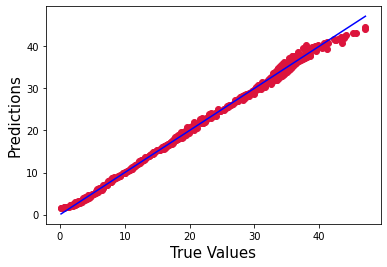

In [23]:

plt.scatter(TestingData['Gas'], TestingData['PredictedGas'], c='crimson')

p1 = max(max(TestingData['PredictedGas']), max(TestingData['Gas']))
p2 = min(min(TestingData['PredictedGas']), min(TestingData['Gas']))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

44/44 [==============================] - 0s 1ms/step


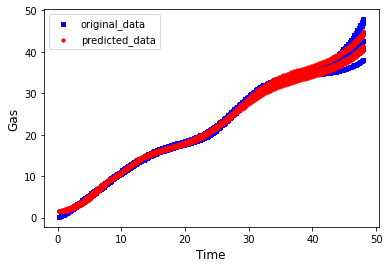

In [24]:
FullPredictions=model.predict(x)

# Scaling the predicted Gas data back to original gas scale
FullPredictions=TargetVarScalerFit.inverse_transform(FullPredictions)





x_plot=df['time']
y1_plot =df['Gas']
y2_plot = FullPredictions

# print(x_plot.size, y1_plot.size, y2_plot.size)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y1_plot, s=10, c='b', marker="s", label='original_data')
ax1.scatter(x_plot, y2_plot, s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')

plt.xlabel('Time', fontsize=12)
plt.ylabel('Gas', fontsize=12)
plt.show()


In [25]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=8, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=2, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[5,10,20],
                      'epochs':[10,20,50,100],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    abs_err = np.abs(orig-pred)
    err_per = (abs_err)/orig
    MAPE = np.mean(err_per) * 100
    MAPE = np.abs(MAPE)
    # print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(x,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10


<ipython-input-25-92190ca72b25>:24: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  RegModel=KerasRegressor(make_regression_ann, verbose=0)


Streaming output truncated to the last 5000 lines.
Epoch 12/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 13/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 14/50
223/223 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 15/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 16/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0073
Epoch 17/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 18/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 19/50
223/223 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 20/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0058
Epoch 21/50
223/223 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 22/50
223/223 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 23/50
223/223 [==========================

{'Optimizer_trial': 'adam', 'batch_size': 20, 'epochs': 10}

In [37]:

model.fit(X_train, y_train ,batch_size = 20, epochs = 10, verbose=0)


# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Gas data back to original gas scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Gas data back to original gas scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)


TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Gas']=y_test_orig
TestingData['PredictedGas']=Predictions

APE=100*(abs(TestingData['Gas']-TestingData['PredictedGas'])/TestingData['Gas'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100 - np.mean(APE))
TestingData.head()

14/14 [==============================] - 0s 2ms/step
The Accuracy of ANN model is: 98.03898001502301


,time,pH,VFA,COD,Gas,PredictedGas,APE
0,29.909548,5.377574,4.308308,8.439824,28.198308,28.374763,0.625766
1,26.773869,5.570751,4.059875,8.840587,23.980526,24.089573,0.454732
2,43.899497,5.020949,4.658255,6.927111,39.087355,39.027424,0.153326
3,31.115578,5.261608,4.386455,8.203876,30.231761,29.911732,1.058585
4,9.648241,5.898612,3.523681,10.710354,10.554546,10.569082,0.137726


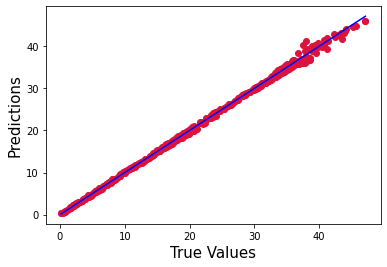

In [38]:

plt.scatter(TestingData['Gas'], TestingData['PredictedGas'], c='crimson')

p1 = max(max(TestingData['PredictedGas']), max(TestingData['Gas']))
p2 = min(min(TestingData['PredictedGas']), min(TestingData['Gas']))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

44/44 [==============================] - 0s 2ms/step


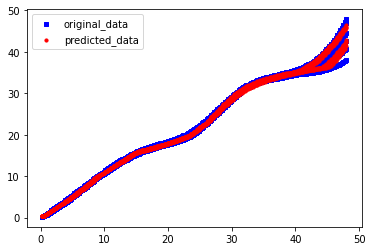

In [39]:
FullPredictions=model.predict(x)

# Scaling the predicted Gas data back to original gas scale
FullPredictions=TargetVarScalerFit.inverse_transform(FullPredictions)





x_plot=df['time']
y1_plot =df['Gas']
y2_plot = FullPredictions

# print(x_plot.size, y1_plot.size, y2_plot.size)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y1_plot, s=10, c='b', marker="s", label='original_data')
ax1.scatter(x_plot, y2_plot, s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')
plt.show()
